# RFP: Maze Solvers

## Project Overview
You are invited to submit a proposal that answers the following question:

### What path will your elf take?

*Please submit your proposal by **2/11/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, use [Gymnasium](https://gymnasium.farama.org/) to set up a [Frozen Lake maze](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) for your project. When you are done with the set up, describe the reward system you plan on using.

*Note, a level 5 maze is at least 10 x 10 cells large and contains at least five lake cells.*

In [1]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Make maze
map_size=10
max_steps=map_size**2
cells=map_size**2
env = gym.make('FrozenLake-v1', desc=generate_random_map(size=map_size), max_episode_steps=max_steps, render_mode="rgb_array", is_slippery=False)
initial_state = env.reset()

env.render()

# Take a step (0: LEFT, 1: DOWN, 2: RIGHT, 3: UP)
#action = 2
#new_state, reward, terminated, truncated, info = env.step(action)

env.render()
env.close()

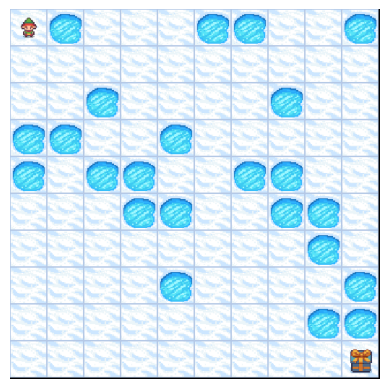

In [3]:
observation = env.render()
plt.imshow(observation)
plt.axis('off')
plt.show()

In [4]:
Qtable = []
actions = ['left', 'down', 'right', 'up']
for state in range(cells):
    action = [0] * len(actions)  
    Qtable.append(action)
Qtable = pd.DataFrame(Qtable, columns=['left', 'down', 'right', 'up'])

In [5]:
Qtable

,left,down,right,up
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
95,0,0,0,0
96,0,0,0,0
97,0,0,0,0
98,0,0,0,0


In [6]:
holes = []
empty = []
goal = []
grid=env.unwrapped.desc
for row in range(map_size):
    for col in range(map_size):
        cell = grid[row][col].decode("utf-8")
        if cell == 'H': 
            holes.append((row, col))
        elif cell == 'F': 
            empty.append((row, col))
        elif cell =='G':
            goal.append((row,col))

In [7]:
holes

[(0, 1),
 (0, 5),
 (0, 6),
 (0, 9),
 (2, 2),
 (2, 7),
 (3, 0),
 (3, 1),
 (3, 4),
 (4, 0),
 (4, 2),
 (4, 3),
 (4, 6),
 (4, 7),
 (5, 3),
 (5, 4),
 (5, 7),
 (5, 8),
 (6, 8),
 (7, 4),
 (7, 9),
 (8, 8),
 (8, 9)]

In [8]:
empty

[(0, 2),
 (0, 3),
 (0, 4),
 (0, 7),
 (0, 8),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 8),
 (2, 9),
 (3, 2),
 (3, 3),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 4),
 (4, 5),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 5),
 (5, 6),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8)]

In [9]:
goal

[(9, 9)]

#### Describe your reward system here.

I plan to make it so each hole is a -1000 penalty, empty (Frozen tile) is -5 penalty, and goal is a +50000 bonus

### 2. Training Your Model
In the cell seen below, write the code you need to train a Q-Learning model. Display your final Q-table once you are done training your model.

*Note, level 5 work uses only the standard Python library and Pandas to train your Q-Learning model. A level 4 uses external libraries like Baseline3.*

In [10]:
# Train model here.
import random
# Don't forget to display your final Q table!

In [11]:
num_states = env.observation_space.n
print(num_states)

100


In [12]:
num_actions = env.action_space.n
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0  
epsilonlimit = 0.01
epsilondecays = 0.995
episodes = 1000

In [13]:
def get_reward(state):
    row, col = divmod(state, map_size)  
    
    if (row, col) in holes:
        return -1000
    elif (row, col) in goal:
        return 50000
    return -5  


In [14]:
from tqdm import tqdm

In [15]:
for episode in tqdm((range(episodes)), desc="training", unit="iteration"):    

    state = env.reset()[0]  
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action_idx = random.randint(0, num_actions - 1) 
        else:
            action_name = Qtable.iloc[state].idxmax()  
            action_idx = actions.index(action_name)  

        new_state, _, done, _, _ = env.step(action_idx) 
        reward = get_reward(new_state)

        max_future_q = max(Qtable.iloc[new_state]) 
        Qtable.iloc[state, action_idx] += learning_rate * (reward + discount_factor * max_future_q - Qtable.iloc[state, action_idx])

        state = new_state  

    epsilon = max(epsilonlimit, epsilon * epsilondecays)

print("Finished finally!")


training:   0%|          | 0/1000 [00:00<?, ?iteration/s]C:\Users\georg\AppData\Local\Temp\ipykernel_17496\3188227824.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Qtable.iloc[state, action_idx] += learning_rate * (reward + discount_factor * max_future_q - Qtable.iloc[state, action_idx])
C:\Users\georg\AppData\Local\Temp\ipykernel_17496\3188227824.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Qtable.iloc[state, action_idx] += learning_rate * (reward + discount_factor * max_future_q - Qtable.iloc[state, action_idx])
C:\Users\georg\AppData\Local\Temp\ipykernel_17496\3188227824.py:17: FutureWarning: Setting an item of incompa

Finished finally!


In [16]:
Qtable

,left,down,right,up
0,4127.809941,42068.630512,-999.840732,7349.070664
1,0.000000,0.000000,0.000000,0.000000
2,-901.522910,-34.405849,-12.915756,-34.514521
3,-32.149479,5237.080569,-32.273559,-32.556462
4,-30.539360,14530.996036,-814.697981,-30.314770
...,...,...,...,...
95,-2.903375,-2.445653,8429.782921,-2.053557
96,-1.498501,-1.498501,38955.036927,4799.487768
97,9263.611614,5842.329254,49495.000000,16453.942515
98,22102.677019,19377.164640,50000.000000,-717.570464


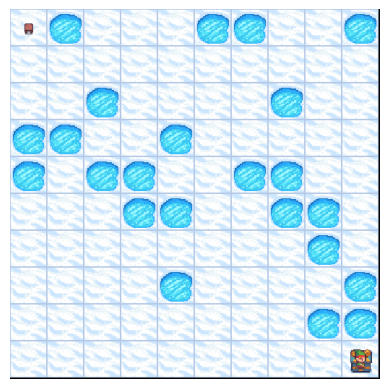

In [17]:
observation = env.render()
plt.imshow(observation)
plt.axis('off')
plt.show()

### 3. Testing Your Model
In the cell seen below, write the code you need to test your Q-Learning model for **1000 episodes**. It is important to test your model for 1000 episodes so that we are all able to compare our results.

*Note, level 5 testing uses both a success rate and an average steps taken metric to evaluate your model. Level 4 uses one or the other.*

In [18]:
# Test model here.

### 4. Final Answer
In the first cell below, describe the path your elf takes to get to the gift. *Note, a level 5 answer includes a gif of the path your elf takes in order to reach the gift.*

In the second cell seen below, describe how well your Q-Learning model performed. Make sure that you explicitly name the **learning rate**, **the discount factor**, and the **reward system** that you used when training your final model. *Note, a level 5 description describes the model's performance using two types of quantitative evidence.*

![example image](https://gymnasium.farama.org/_images/frozen_lake.gif)

#### Describe the path your elf takes here.

#### Describe how well your Q-Learning model performed here.